In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

# import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
# from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
Ravdess = r"C:\Users\meloy\PycharmProjects\MLProject-2\Data\Radeves\audio_speech_actors_01-24\\"
Crema = r"C:\Users\meloy\PycharmProjects\MLProject-2\Data\Crema\AudioWAV\\"
Tess = r"C:\Users\meloy\PycharmProjects\MLProject-2\Data\Tess\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data\\"
Savee = r"C:\Users\meloy\PycharmProjects\MLProject-2\Data\Savee\ALL\\"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
1  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
2  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
3  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
4     calm  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...

In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
1  disgust  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
2     fear  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
3    happy  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
4  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...

In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
1    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
2    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
3    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
4    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...

In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
1    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
2    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
3    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
4    angry  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...

In [7]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("Data\All.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
1  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
2  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
3  neutral  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...
4     calm  C:\Users\meloy\PycharmProjects\MLProject-2\Dat...

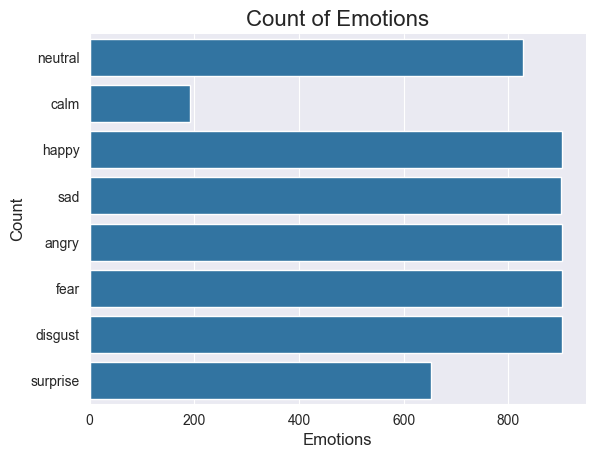

In [8]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

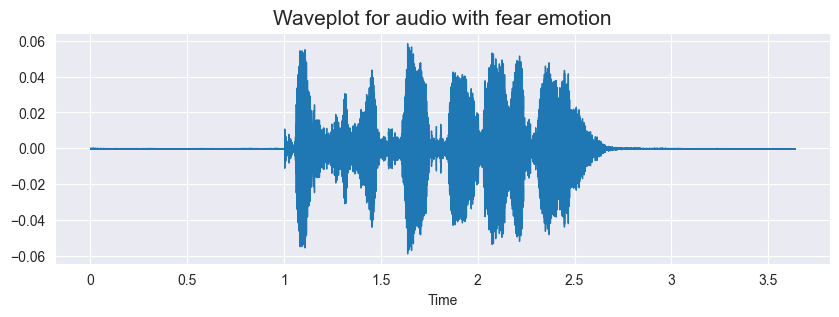

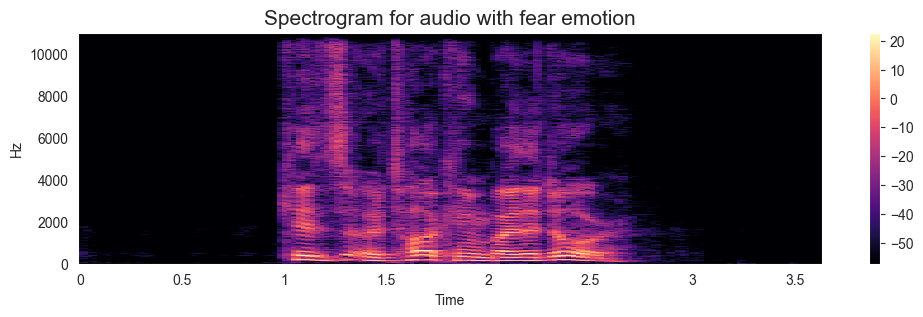

In [10]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

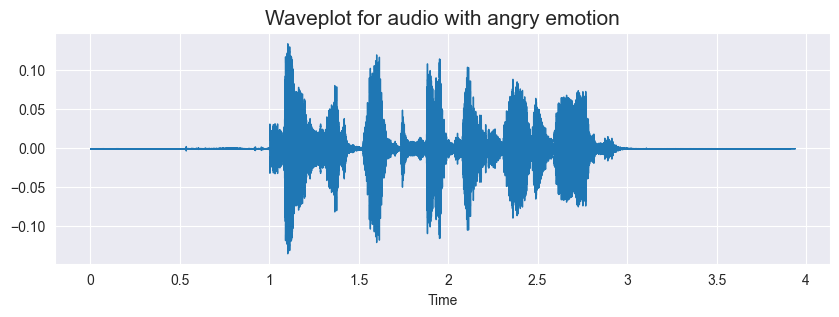

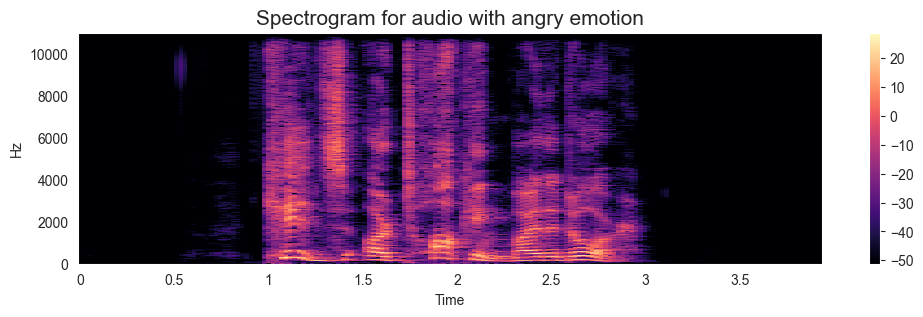

In [11]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

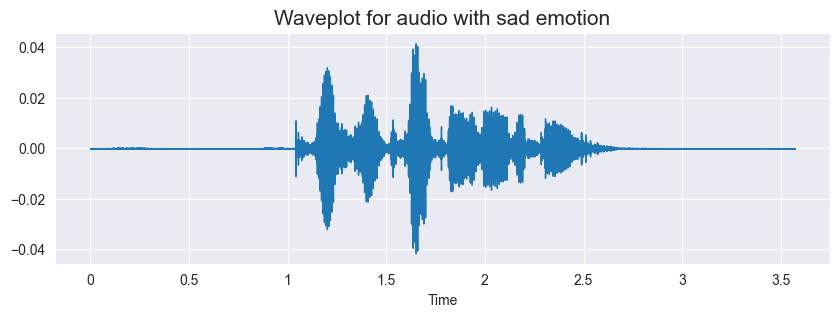

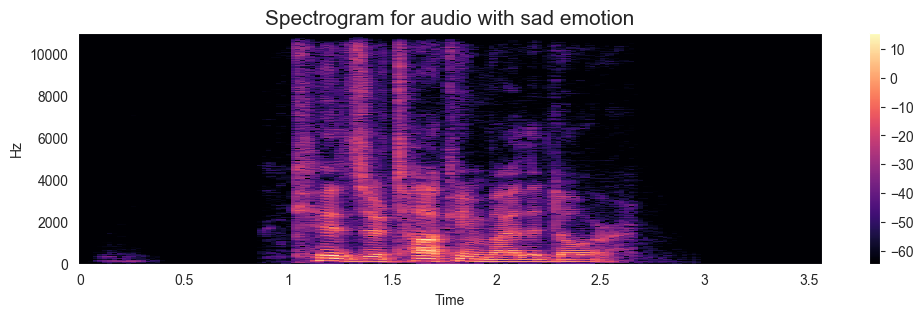

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

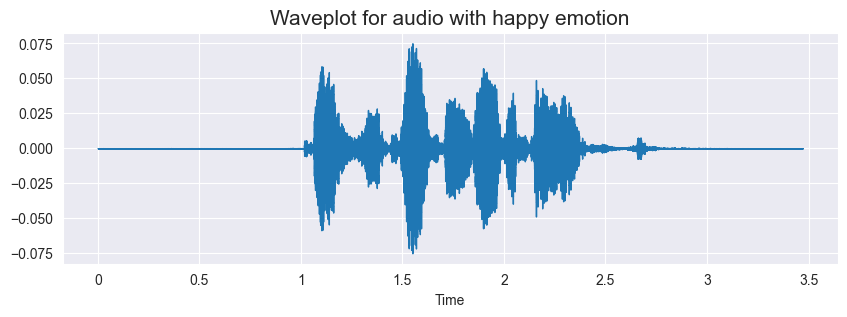

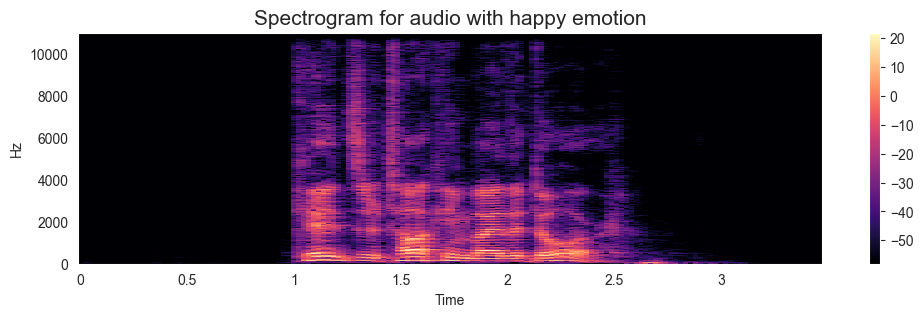

In [13]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

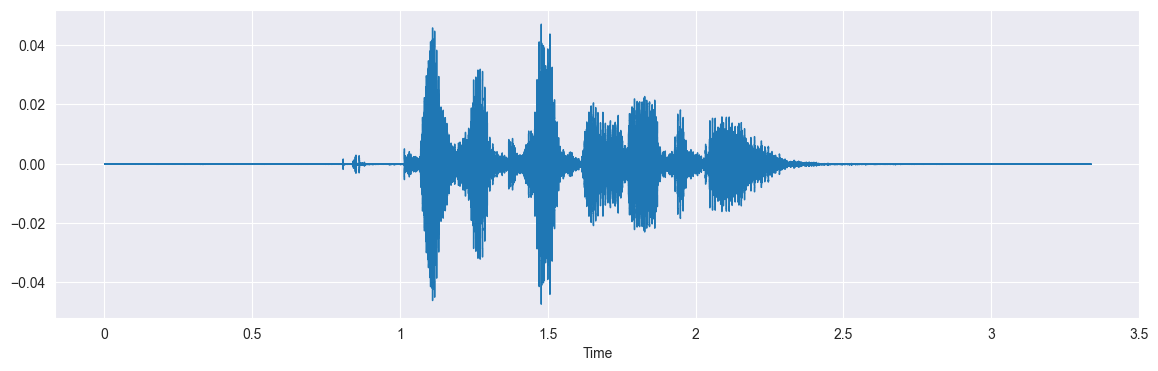

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

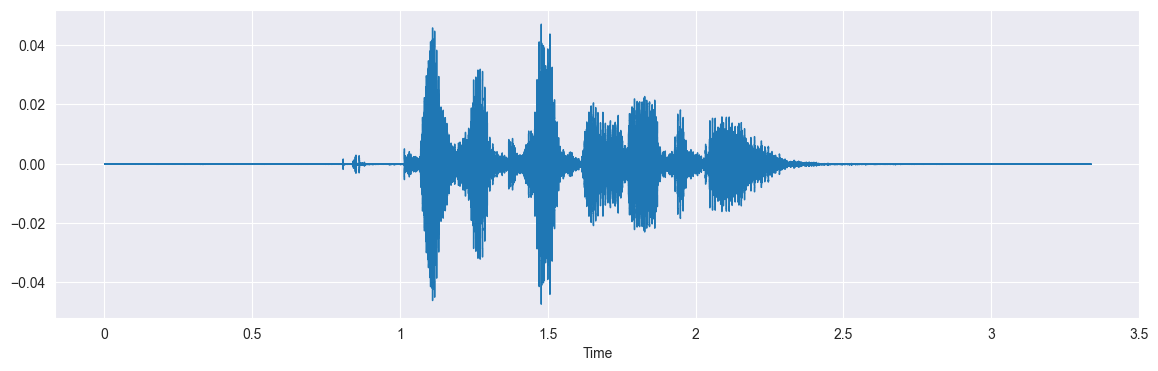

In [16]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

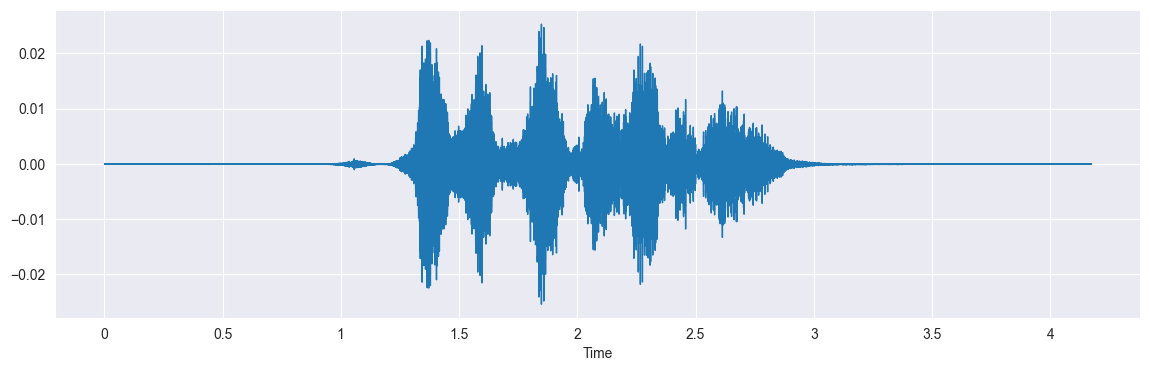

In [17]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

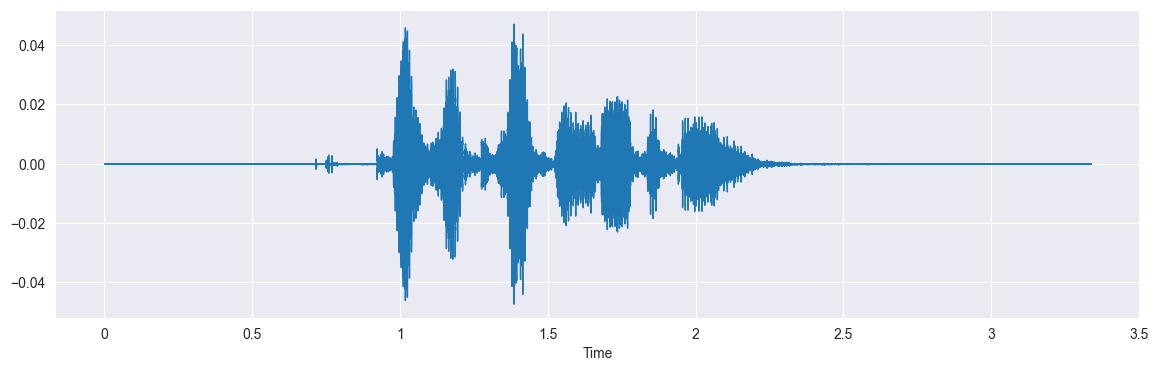

In [18]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

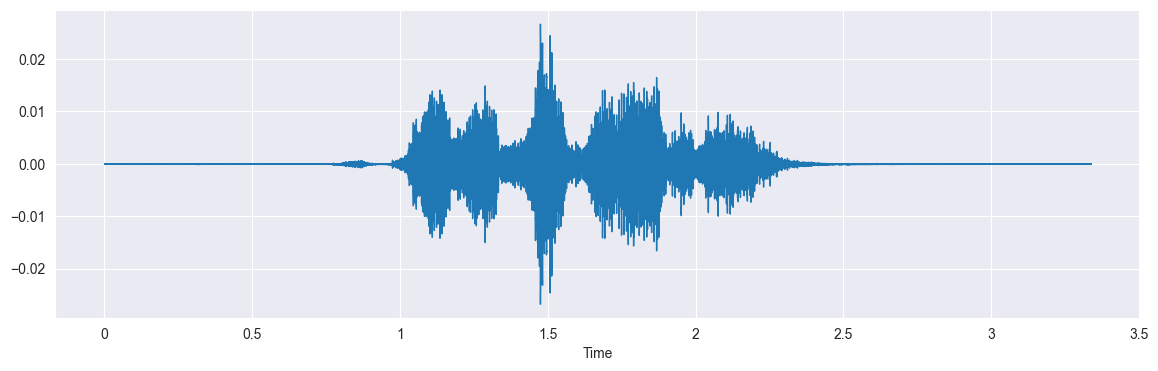

In [19]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [20]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    # Spectral Shift
    stft = librosa.stft(data, n_fft=2048, hop_length=512)
    stft_magnitude = np.abs(stft)  # Get the magnitude of STFT
    
    # Spectral Contrast
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(S=stft_magnitude, sr=sample_rate).T, axis=0)
    result = np.hstack((result, spectral_contrast))  # stacking horizontally

    # Compute Tonal Centroid Features (Tonnetz)
    y_harmonic, y_percussive = librosa.effects.hpss(data)
    tonnetz = np.mean(librosa.feature.tonnetz(y=y_harmonic, sr=sample_rate).T, axis=0)
    result = np.hstack((result, tonnetz))
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [21]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [22]:
len(X), len(Y), data_path.Path.shape

(18543, 18543, (6181,))

In [23]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.287358  0.751815  0.798325  0.780900  0.783317  0.789549  0.702801   
2  0.188256  0.622125  0.699215  0.753343  0.721212  0.701727  0.682356   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.319092  0.760329  0.804353  0.816574  0.783742  0.784606  0.764283   

          7         8         9  ...        166        167        168  \
0  0.684966  0.733049  0.753972  ...  15.750958  17.976807  46.214819   
1  0.671131  0.714003  0.749860  ...  15.100827  15.645640  13.969157   
2  0.662828  0.686486  0.733960  ...  17.826261  20.660192  48.723602   
3  0.628977  0.679179  0.707283  ...  15.745660  17.866520  45.765516   
4  0.654999  0.690312  0.729373  ...  14.501305  14.563737  13.478517   

        169       170       171       172       173       174   labels  
0 -0.047766  0.019257 -0.063752 -0.061413  0.015118  0.012608  neutral  
1 -0.005516  0.008214 -0.061723 -0.011057  0.004770  0.014857  neutral  
2  0.028208 -0.005756  0.028355 -0.088915  0.020784 -0.001340  neutral  
3 -0.069876  0.026579 -0.096719 -0.062458  0.023446 -0.008156  neutral  
4 -0.025299  0.011269 -0.084744 -0.028431  0.005060 -0.006731  neutral  

[5 rows x 176 columns]

In [5]:
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.287358  0.751815  0.798325  0.780900  0.783317  0.789549  0.702801   
2  0.188256  0.622125  0.699215  0.753343  0.721212  0.701727  0.682356   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.319092  0.760329  0.804353  0.816574  0.783742  0.784606  0.764283   

          7         8         9  ...        166        167        168  \
0  0.684966  0.733049  0.753972  ...  15.750958  17.976807  46.214819   
1  0.671131  0.714003  0.749860  ...  15.100827  15.645640  13.969157   
2  0.662828  0.686486  0.733960  ...  17.826261  20.660192  48.723602   
3  0.628977  0.679179  0.707283  ...  15.745660  17.866520  45.765516   
4  0.654999  0.690312  0.729373  ...  14.501305  14.563737  13.478517   

        169       170       171       172       173       174   labels  
0 -0.047766  0.019257 -0.063752 -0.061413  0.015118  0.012608  neutral  
1 -0.005516  0.008214 -0.061723 -0.011057  0.004770  0.014857  neutral  
2  0.028208 -0.005756  0.028355 -0.088915  0.020784 -0.001340  neutral  
3 -0.069876  0.026579 -0.096719 -0.062458  0.023446 -0.008156  neutral  
4 -0.025299  0.011269 -0.084744 -0.028431  0.005060 -0.006731  neutral  

[5 rows x 176 columns]

In [2]:
Features = pd.read_csv('features.csv')

In [6]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [7]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=10, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13907, 175), (13907, 8), (4636, 175), (4636, 8))

In [8]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13907, 175), (13907, 8), (4636, 175), (4636, 8))

In [9]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from model import MultiLayerNetwork

In [ ]:
input_size = x_train.shape[1]  
output_size = y_train.shape[1]  

hidden_layer_sizes = 5*[50]  

layer_sizes = [input_size] + hidden_layer_sizes + [output_size]

nn = MultiLayerNetwork(layer_sizes)

nn.train(x_train, y_train, epochs=3000)

def evaluate(X, Y, model):
    logits = model.forward(X)
    predictions = np.argmax(logits, axis=1)
    true_classes = np.argmax(Y, axis=1)
    accuracy = accuracy_score(true_classes, predictions)
    report = classification_report(true_classes, predictions)
    return accuracy, report

train_accuracy, train_report = evaluate(x_train, y_train, nn)
print(f"Training Accuracy: {train_accuracy:.2f}")
print("Training Classification Report:")
print(train_report)

test_accuracy, test_report = evaluate(x_test, y_test, nn)
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Testing Classification Report:")
print(test_report)